In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

CSV = Path("../data/airbnb_nyc.csv")


df = pd.read_csv(CSV, engine="python", encoding="utf-8", on_bad_lines="skip")

df.shape
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;;;;
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365;;;;;
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355;;;;;
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365;;;;;
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194;;;;;
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0;;;;;


In [2]:
# tirar preços <= 0
df = df[df["price"] > 0]

# reviews_per_month vazio vira 0
if "reviews_per_month" in df.columns:
    df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# cap no 99% do preço (só pra visualização ficar melhor)
p99 = df["price"].quantile(0.99)
df["price_cap"] = df["price"].clip(upper=p99)

df.shape


(41535, 17)

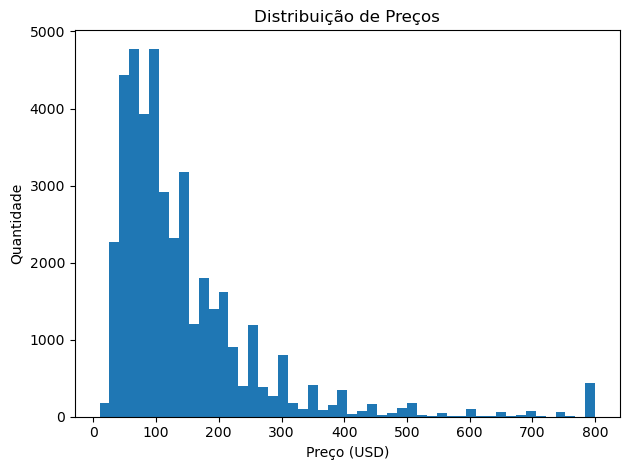

In [3]:
import os
IMG_DIR = "../images"
os.makedirs(IMG_DIR, exist_ok=True)

# histograma de preço
plt.hist(df["price_cap"], bins=50)
plt.title("Distribuição de Preços")
plt.xlabel("Preço (USD)")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "preco_hist.png"))
plt.show()


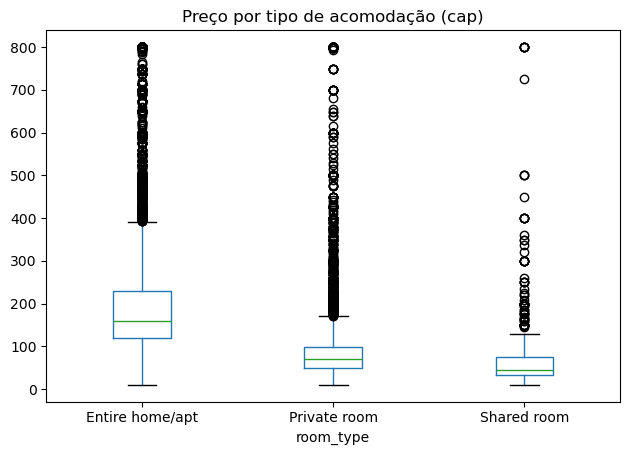

In [4]:
# boxplot por tipo de quarto
df.boxplot(column="price_cap", by="room_type", grid=False)
plt.title("Preço por tipo de acomodação (cap)")
plt.suptitle("")  # tira o título automático
plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, "preco_por_tipo_box.png"))
plt.show()


In [5]:
# mediana por borough
med_borough = df.groupby("neighbourhood_group")["price"].median().sort_values(ascending=False)
med_borough


neighbourhood_group
Manhattan        150.0
Brooklyn          90.0
Queens            75.0
Staten Island     75.0
Bronx             65.0
Name: price, dtype: float64

In [6]:
# mediana por tipo de quarto
med_tipo = df.groupby("room_type")["price"].median().sort_values(ascending=False)
med_tipo


room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64